In [55]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [56]:
# Function Definitions
def preprocess_data(df):
    X = df.drop(columns=['y'])
    y = df['y']
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=42)
    return X_train, X_valid, y_train, y_valid

In [57]:
# def evaluate_model(model, X_valid, y_valid):
#     y_pred = model.predict(X_valid)
#     print(classification_report(y_valid, y_pred))

def evaluate_model(model, X_valid, y_valid):
    y_pred = model.predict(X_valid)
    print(classification_report(y_valid, y_pred, zero_division=1))







In [58]:
# Load the dataset
#df = pd.read_csv("bank-full.csv", delimiter=";")
df = pd.read_csv("bank.csv", delimiter=";")
# Define feature types
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
binary_features = ['default', 'housing', 'loan', 'y']

In [59]:
# pre-processing categorical_features
label_encoder = LabelEncoder()
for column in categorical_features:
    if column in df.columns: 
        df[column] = label_encoder.fit_transform(df[column])

for column in binary_features:
    if column in df.columns:
        df[column] = label_encoder.fit_transform(df[column])

In [60]:
# Split the dataset based on the "marital" feature into three populations: married, single, and divorced
pop_married = df[df['marital'] == 1]
pop_single = df[df['marital'] == 2]
pop_divorced = df[df['marital'] == 0]
pca = PCA(n_components=1)  # Reduce number of features by half

# ANN

In [61]:
# def fit_ann(X_train, y_train):
#     model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', alpha=0.0001,
#                           max_iter=1000, random_state=42)
#     scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
#     mean_accuracy = scores.mean()
    
#     # Plot the 5-fold cross-validation scores
#     plt.figure(figsize=(8, 6))
#     plt.plot(range(1, 6), scores, marker='o', linestyle='-')
#     plt.title('5-Fold Cross-Validation Accuracy (ANN)')
#     plt.xlabel('Fold')
#     plt.ylabel('Accuracy')
#     plt.xticks(range(1, 6))
#     plt.grid(True)
#     plt.show()
    
#     print("Mean accuracy over 5 folds (ANN):", mean_accuracy)

#     # Fit the model on the entire training set
#     model.fit(X_train, y_train)
#     return model, mean_accuracy

def fit_ann(X_train, y_train):
    # Define the parameter grid
    parameters = {
        'hidden_layer_sizes': [(50,), (100,), (150,)],  # Testing 3 options for hidden_layer_sizes
        'activation': ['logistic', 'tanh', 'relu'],     # Testing 3 options for activation
        'alpha': [0.0001, 0.001, 0.01, 0.1, 1]          # Testing 5 values for alpha
    }
    
    # Create the model
    model = MLPClassifier(max_iter=1000, random_state=42)
    
    # Perform grid search
    grid_search = GridSearchCV(model, parameters, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Get the best model and its mean accuracy
    best_model = grid_search.best_estimator_
    mean_accuracy = grid_search.best_score_
    
    # Plot the 5-fold cross-validation scores
    scores = grid_search.cv_results_['mean_test_score']
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-')
    plt.title('5-Fold Cross-Validation Accuracy')
    plt.xlabel('Configuration')
    plt.ylabel('Accuracy')
    plt.xticks(range(1, len(scores) + 1))
    plt.grid(True)
    plt.show()

    # Print the mean accuracy over 5 folds
    print("Mean accuracy over 5 folds:", mean_accuracy)

    return best_model



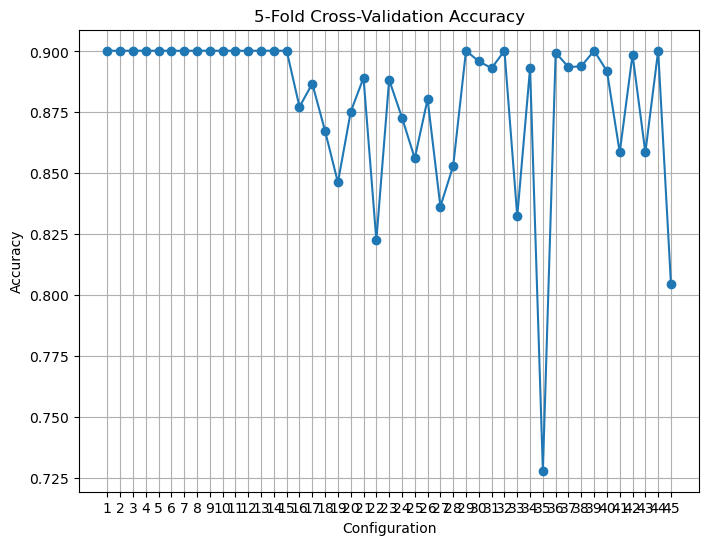

Mean accuracy over 5 folds: 0.9002784878033386
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       254
           1       1.00      0.00      0.00        26

    accuracy                           0.91       280
   macro avg       0.95      0.50      0.48       280
weighted avg       0.92      0.91      0.86       280



In [62]:
# Preprocess data for married population and split into train/validation sets
X_train_married, X_valid_married, y_train_married, y_valid_married = train_test_split(pop_married.drop(columns=['y']), pop_married['y'], test_size=0.1, random_state=42)

# Dimensionality Reduction for married population
X_train_married_pca = pca.fit_transform(X_train_married)

# Fit PCA with training data for married population
pca.fit(X_train_married)

# Transform validation data for married population
X_valid_married_pca = pca.transform(X_valid_married)

# Model fitting after dimensionality reduction for married population
ann_married_pca = fit_ann(X_train_married_pca, y_train_married)


# Model evaluation on validation set after dimensionality reduction for married population
evaluate_model(ann_married_pca, X_valid_married_pca, y_valid_married)

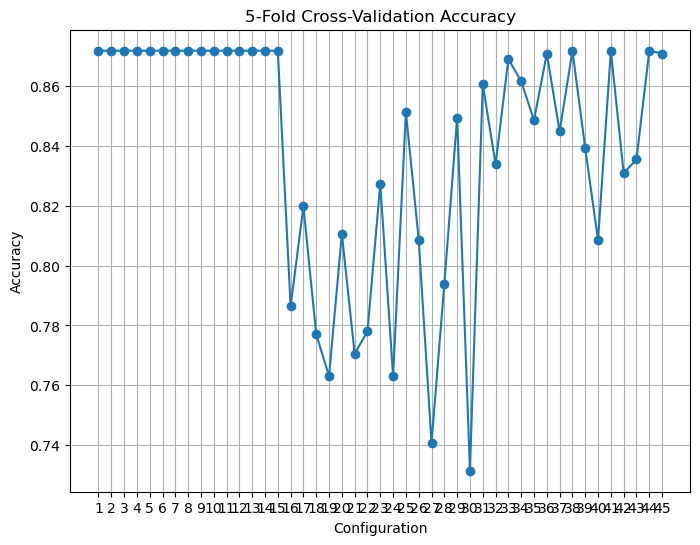

Mean accuracy over 5 folds: 0.8717484926787252
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        91
           1       1.00      0.00      0.00        29

    accuracy                           0.76       120
   macro avg       0.88      0.50      0.43       120
weighted avg       0.82      0.76      0.65       120



In [63]:
# Preprocess data for single population and split into train/validation sets
X_train_single, X_valid_single, y_train_single, y_valid_single = preprocess_data(pop_single)

# Dimensionality Reduction for single population
X_train_single_pca = pca.fit_transform(X_train_single)

# Fit PCA with training data for single population
pca.fit(X_train_single)

# Transform validation data for single population
X_valid_single_pca = pca.transform(X_valid_single)

# Model fitting after dimensionality reduction for single population
ann_single_pca = fit_ann(X_train_single_pca, y_train_single)

# Model evaluation on validation set after dimensionality reduction for single population
evaluate_model(ann_single_pca, X_valid_single_pca, y_valid_single)

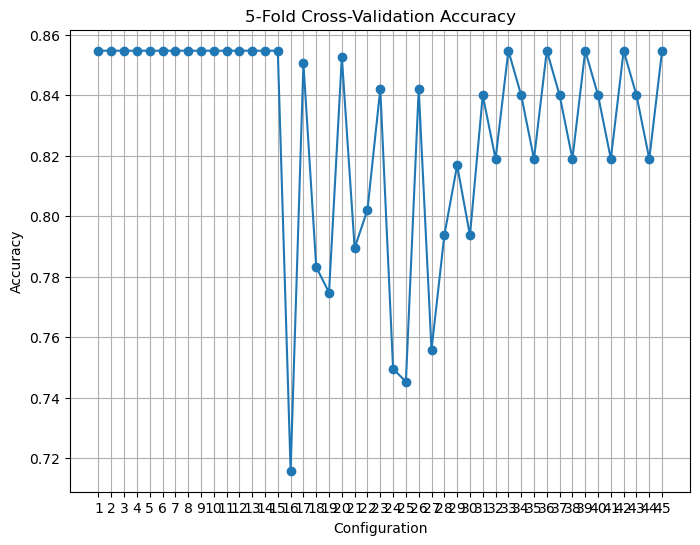

Mean accuracy over 5 folds: 0.8547368421052631
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        45
           1       1.00      0.00      0.00         8

    accuracy                           0.85        53
   macro avg       0.92      0.50      0.46        53
weighted avg       0.87      0.85      0.78        53



In [64]:
# Preprocess data for divorced population and split into train/validation sets
X_train_divorced, X_valid_divorced, y_train_divorced, y_valid_divorced = preprocess_data(pop_divorced)

# Dimensionality Reduction for divorced population
X_train_divorced_pca = pca.fit_transform(X_train_divorced)

# Fit PCA with training data for divorced population
pca.fit(X_train_divorced)

# Transform validation data for divorced population
X_valid_divorced_pca = pca.transform(X_valid_divorced)

# Model fitting after dimensionality reduction for divorced population
ann_divorced_pca = fit_ann(X_train_divorced_pca, y_train_divorced)

# Model evaluation on validation set after dimensionality reduction for divorced population
evaluate_model(ann_divorced_pca, X_valid_divorced_pca, y_valid_divorced)

# Decision Tree

In [65]:
# def fit_decision_tree(X_train, y_train):
#     # Define hyperparameters
#     params = {
#         'max_depth': 5,
#         'min_samples_split': 2,
#         'min_samples_leaf': 1,
#         'max_features': None,  # Use all features
#         'random_state': 42
#     }
    
#     # Initialize the model with specified hyperparameters
#     model = DecisionTreeClassifier(**params)
    
#     # Perform 5-fold cross-validation
#     scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
#     mean_accuracy = scores.mean()
    
#     # Plot the 5-fold cross-validation scores
#     plt.figure(figsize=(8, 6))
#     plt.plot(range(1, 6), scores, marker='o', linestyle='-')
#     plt.title('5-Fold Cross-Validation Accuracy (Decision Tree)')
#     plt.xlabel('Fold')
#     plt.ylabel('Accuracy')
#     plt.xticks(range(1, 6))
#     plt.grid(True)
#     plt.show()
    
#     print("Mean accuracy over 5 folds (Decision Tree):", mean_accuracy)

#     # Fit the model on the entire training set
#     model.fit(X_train, y_train)
#     return model, mean_accuracy

def fit_decision_tree(X_train, y_train):
    parameters = {
        'criterion': ['gini', 'entropy'],  # Testing 2 options for criterion
        'max_depth': [None, 10, 20],       # Testing 3 options for max_depth
        'min_samples_split': [2, 5, 10],    # Testing 3 options for min_samples_split
        'min_samples_leaf': [1, 2, 4]      # Testing 3 options for min_samples_leaf
    }
    model = DecisionTreeClassifier(random_state=42)
    grid_search = GridSearchCV(model, parameters, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_model = DecisionTreeClassifier(random_state=42, **best_params)
    best_model.fit(X_train, y_train)

    # Plot the 5-fold cross-validation scores
    cv_results = grid_search.cv_results_
    scores = cv_results['mean_test_score']
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-')
    plt.title('5-Fold Cross-Validation Accuracy (Decision Tree)')
    plt.xlabel('Hyperparameter Configuration')
    plt.ylabel('Mean Accuracy')
    plt.grid(True)
    plt.show()

    # Print the best hyperparameters
    print("Best hyperparameters:", best_params)
    
    # Print the mean accuracy over 5 folds
    print("Mean accuracy over 5 folds:", grid_search.best_score_)

    return best_model


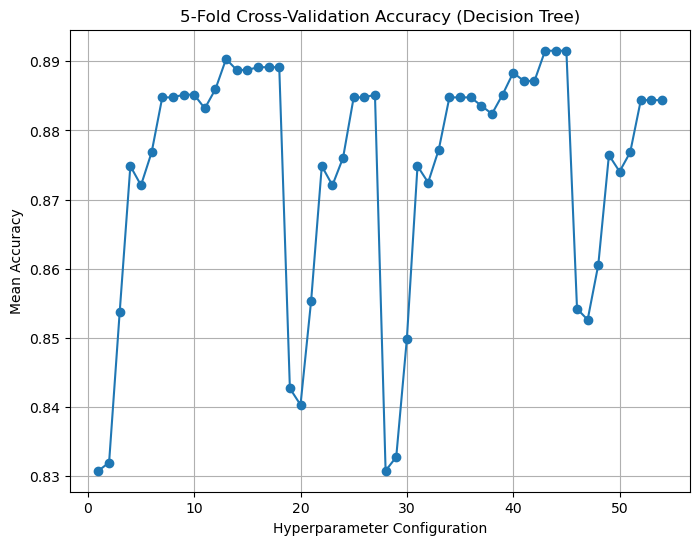

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Mean accuracy over 5 folds: 0.8915364953138314
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       254
           1       0.00      0.00      1.00        26

    accuracy                           0.90       280
   macro avg       0.45      0.50      0.97       280
weighted avg       0.82      0.90      0.95       280



In [66]:
# Preprocess data for married population and split into train/validation sets
X_train_married, X_valid_married, y_train_married, y_valid_married = preprocess_data(pop_married)

# Dimensionality Reduction for married population
X_train_married_pca = pca.fit_transform(X_train_married)

# Fit PCA with training data for married population
pca.fit(X_train_married)

# Transform validation data for married population
X_valid_married_pca = pca.transform(X_valid_married)

# Model fitting after dimensionality reduction for married population
decision_tree_married_pca = fit_decision_tree(X_train_married_pca, y_train_married)

# Model evaluation on validation set after dimensionality reduction for married population
evaluate_model(decision_tree_married_pca, X_valid_married_pca, y_valid_married)


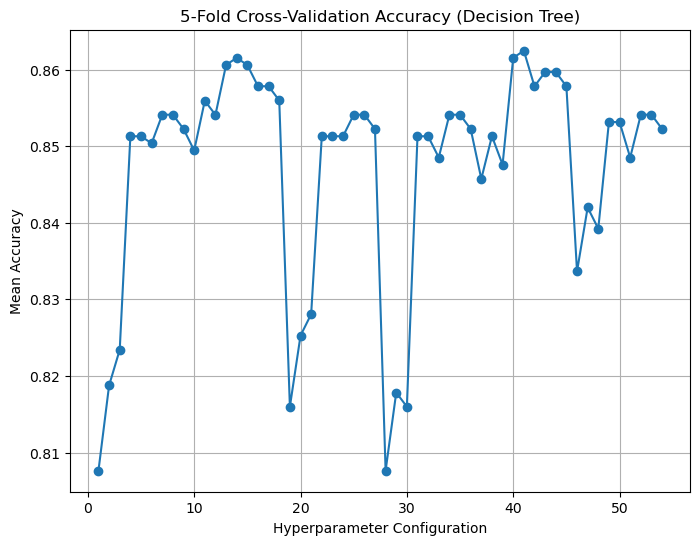

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Mean accuracy over 5 folds: 0.8624633936261843
              precision    recall  f1-score   support

           0       0.77      0.98      0.86        91
           1       0.50      0.07      0.12        29

    accuracy                           0.76       120
   macro avg       0.63      0.52      0.49       120
weighted avg       0.70      0.76      0.68       120



In [67]:
# Preprocess data for single population and split into train/validation sets
X_train_single, X_valid_single, y_train_single, y_valid_single = preprocess_data(pop_single)

# Dimensionality Reduction for single population
X_train_single_pca = pca.fit_transform(X_train_single)

# Fit PCA with training data for single population
pca.fit(X_train_single)

# Transform validation data for single population
X_valid_single_pca = pca.transform(X_valid_single)

# Model fitting after dimensionality reduction for single population
decision_tree_single_pca = fit_decision_tree(X_train_single_pca, y_train_single)

# Model evaluation on validation set after dimensionality reduction for single population
evaluate_model(decision_tree_single_pca, X_valid_single_pca, y_valid_single)



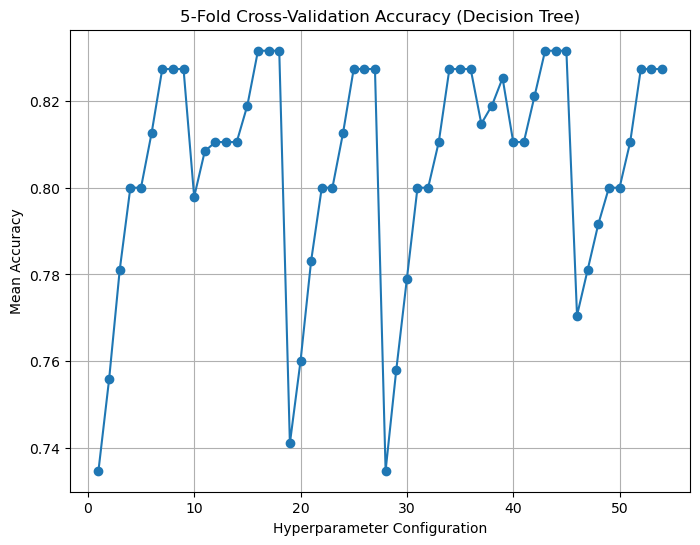

Best hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Mean accuracy over 5 folds: 0.8315789473684211
              precision    recall  f1-score   support

           0       0.85      0.98      0.91        45
           1       0.00      0.00      1.00         8

    accuracy                           0.83        53
   macro avg       0.42      0.49      0.95        53
weighted avg       0.72      0.83      0.92        53



In [68]:
# Preprocess data for divorced population and split into train/validation sets
X_train_divorced, X_valid_divorced, y_train_divorced, y_valid_divorced = preprocess_data(pop_divorced)

# Dimensionality Reduction for divorced population
X_train_divorced_pca = pca.fit_transform(X_train_divorced)

# Fit PCA with training data for divorced population
pca.fit(X_train_divorced)

# Transform validation data for divorced population
X_valid_divorced_pca = pca.transform(X_valid_divorced)

# Model fitting after dimensionality reduction for divorced population
decision_tree_divorced_pca = fit_decision_tree(X_train_divorced_pca, y_train_divorced)

# Model evaluation on validation set after dimensionality reduction for divorced population
evaluate_model(decision_tree_divorced_pca, X_valid_divorced_pca, y_valid_divorced)
